## Scalable Deployment

How our models get deployed in a scalable way depends a lot on the existing infrastructure, but we can break them down into two paradigms: orchestration and serverless. With a serverless service, our model will be containerized and then run when triggered by a request or event. GCP Google Cloud Run and AWS Lambda are good examples of serverless services that can scale up based on need, and we don't have to worry about container orchestration and maintaining the infrastructure. The issues with serverless services are: model size would need to be small; there is a cold-start problem if the model hasn't been triggered in awhile; and it's not easy to build more complex pipelines.

The other option is to use container orchestration, most likely with Kubernetes. We have docker images that we built in the previous lab. To scale these out we would now have to worry about how we can create a deployment in Kubernetes, which can be technically challenging. There are a couple of tools out there that promise to make it easy to create scalable REST or gRPC APIs out of our ML models, such as [Seldon](https://www.seldon.io/). These tools always come with a bunch of other features to make them more comprehensive. We don't really need any of those other features right now, so we can keep ours basic and just deploy our web app in Kubernetes ourselves. Note that we will deploy the FastAPI version of our model, not the Streamlit version. We'll do this in two steps: use Minikube; and then use GCP.

## Minikube

To deploy our FastAPI app to a local Kubernetes cluster we will use minikube. But first, we need to write the manifest, i.e. the deployment and services, which tells Kubernetes how to deploy our application.

Review Lab 4 to complete the following steps:

- Write reddit_deployment.yaml and reddit_services.yaml files.  
- Start minikube.   
- Build the docker image in the minikube cluster.  
- Deploy the application to the cluster.  

When completed successfully, the app should open in the browser and work just as it did locally.


## GKE

Now that we have seen that the image will work in a local cluster, let's deploy it to the GKE cluster. In order to do this we need to do these three steps:

- Push the image to GCP repo.  
- Start a GKE cluster.   
- Deploy the image to the cluster.  

As we did in previous labs, I would encourage you to start with a fresh project. First, review the commands necessary to push the image to the GCP repository from the previous labs, and do so. Once that is done, there are two ways to create a GKE cluster, in the console, or in the terminal. Either one is fine.

This command will attempt to create a cluster exactly the way you want, but I would warn against doing this. What you specify here may not be enough, or it may be too much. Instead, I would suggest creating an Autopilot cluster using the second command below.  
`gcloud container clusters create <cluster-name> --num-nodes=3 --region=us-west2 --disk-size=50`

`gcloud container clusters create-auto <cluster-name> --region=us-west1`

After the GKE cluster is created, test that we can connect to it:

`gcloud container clusters get-credentials <cluster-name> --region=us-west2`

Now we should be able to use `kubectl` and it will interact with the GKE cluster. We will need to modify the deployment and service yaml files for the app to work in GCP. For the deployment yaml file we need to change the location of the image that will be run. For the service yaml we need to change the service to type `LoadBalancer` and change the port, targetPort, and delete the nodePort. Then, use the same `kubectl` commands to apply the deployment and services as was done above.

If successful, we should be able to go into the console, into the GKE section, and see the deployment running. 

# Scalable Deployment Lab

## Overview

Deploying a ML model requires true scalability (and security, which we haven't talked about), and typically this means using containers, and orchestration through something like Kubernetes. Serverless services are also an option, but only for small, simple applications.

## Goal

Our goal today is to get our very simple FastAPI Reddit app up and running in Kubernetes both locally, using Minikube, and in GCP, using GKE. You do not need to use your model that you've been using on previous labs for this, we'll just use the Reddit app from the demo. 

## Instructions

All we need to do is follow the steps outlined above in order to deploy the Reddit app locally, and then again in GCP. I've only provided outlines of the steps needed, along with one set of commands that we haven't used before, for creating the K8s cluster in GCP - previously we used Terraform because Metaflow needed a lot of other services up and running. By reviewing previous labs, and consulting with chatGPT/Google, we should be able to deploy these successfully. I also have working versions of the deployment and service yaml files which are needed for Kubernetes, and I will post these to Canvas *at some point*, but GenAI should be able to help you with it.

### Turning It In 

Take a screenshot of your terminal that shows that you launched your app in Minikube successfully, then another screenshot of the app actually running, by going to the `/docs` page, and include the URL in your screenshot.

Take another screenshot demonstrating that your app is up and running in GCP. You can do this by going to your Google Cloud Console, go to Kubernetes Engine, go to Workloads, and scroll down to Exposing Services, and take a screenshot showing your reddit service and the endpoint that is listed there. Then take another screenshot of the actual running app including its URL, by going to the `/docs` page of the app.

Here's what it should look like in the cloud console:

![Screenshot 2025-04-24 at 9.36.48 AM.png](<attachment:Screenshot 2025-04-24 at 9.36.48 AM.png>)

And here's the actual app running:



![Screenshot 2025-04-24 at 9.34.26 AM.png](<attachment:Screenshot 2025-04-24 at 9.34.26 AM.png>)

Push your manifest files, Dockerfile, requirements.txt, and the FastAPI script to Github, submit your Github URL along with the four screenshots from above in a pdf file.
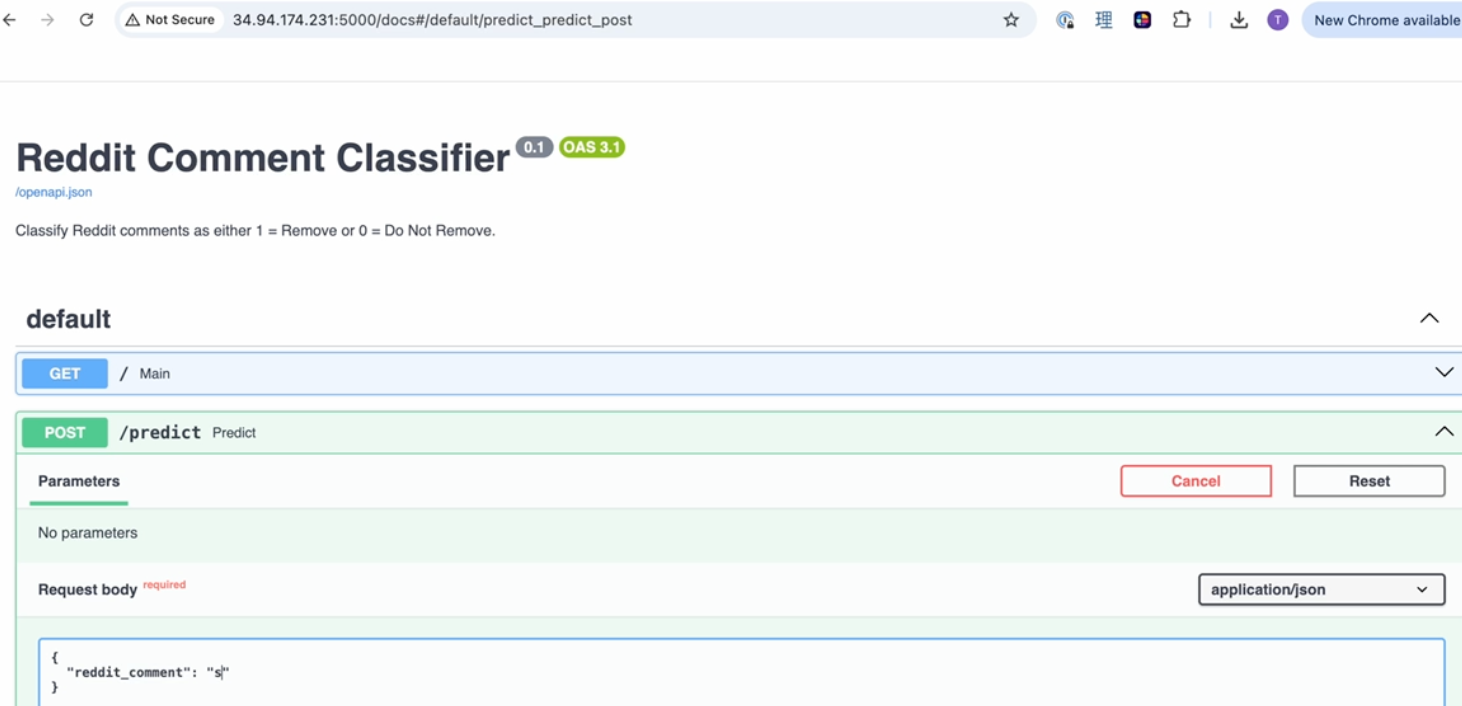
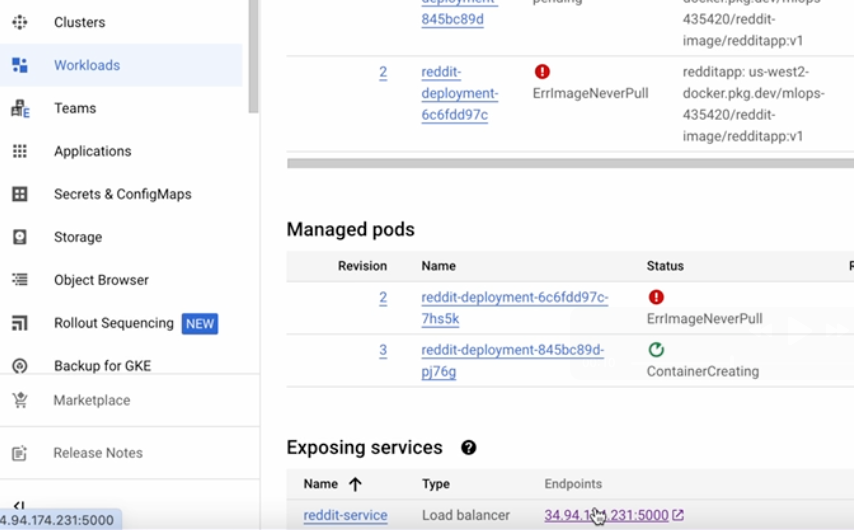